
# Trabajo practico semana 1:
### Nicolas Pereyra

### Consignas de la actividad:

1) Hallar la transferencia T=VoVi en función de ωo y Q.

2) Obtener el valor de los componentes del circuito de forma tal que ωo=1 y Q=3.

3) Ajustar el valor de R1 de forma tal que |T(0)|=20dB.

# 1)
## Funcion transferecia:
\begin{equation}
H(s)= \frac{-\frac{1}{R1.R3.C²}}{s²+s\frac{1}{C.R2}+\frac{1}{R3².C²}}
\end{equation}
### Funcion generalizada:
\begin{equation}
H(s)= \frac{-w_n²}{s²+s\frac{w_d}{q}+w_d²}
\end{equation}

\begin{equation}
w_n = \sqrt{\frac{1}{R1.R3.C²}}  ;  wd = \frac{1}{R3.C} ;  q = \frac{R2}{R3}
\end{equation}

\begin{equation}
w_o = w_d = \frac{w_n}{k} => k = \sqrt{\frac{R3}{R1}} 
\end{equation}

#### Rescribir la funcion generalizada:
\begin{equation}
H(s)= \frac{-k.w_o²}{s²+s\frac{w_o}{q}+w_o²}
\end{equation}


# 2)
Para que $w_o$ sea igual se tiene que cumplir que $R_3$ sea reciprocamente equivalente a $C$, rjemplo: $R_3 = 10k \Omega$ y $C = 100uF$. Por otro lado si se quiere tener un $q = 3,$ $R_2$ tendra que ser 3 veces $R_3$, ejemplo: $R_2 = 30k \Omega$


# 3) 
Para que esto suceda se tiene que cumplir lo siguiente:
\begin{equation}
20.log(k) = 20db => k = 10 => R3 = 100.R1
\end{equation}
Si utilizamos los valores de los componentes elegidos en el punto anterior R1 = 100 ohm.

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

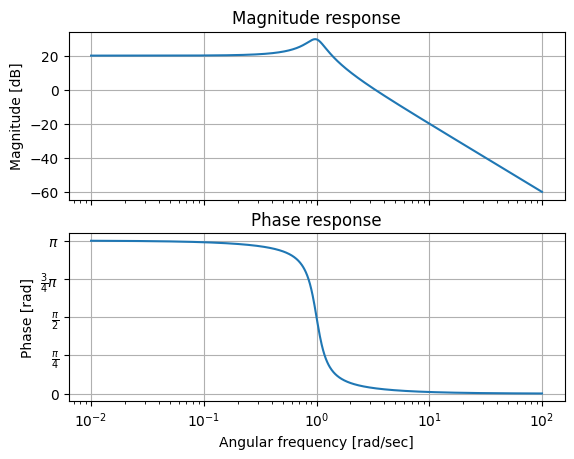

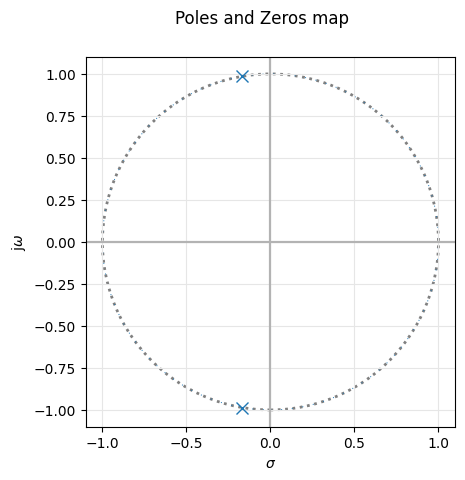

In [1]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, bodePlot

R3 = 10*10**3
R1 = 100
k = (R3/R1)**(1/2) # k = (R3/R1)
q = 3

plt.close('all')


    
my_tf = TransferFunction( [-1*k], [1, 1/q, 1])

bodePlot(my_tf, fig_id=1)

pzmap(my_tf, fig_id=2) #S plane pole/zero plot

## Resolucion de la trasferencia:
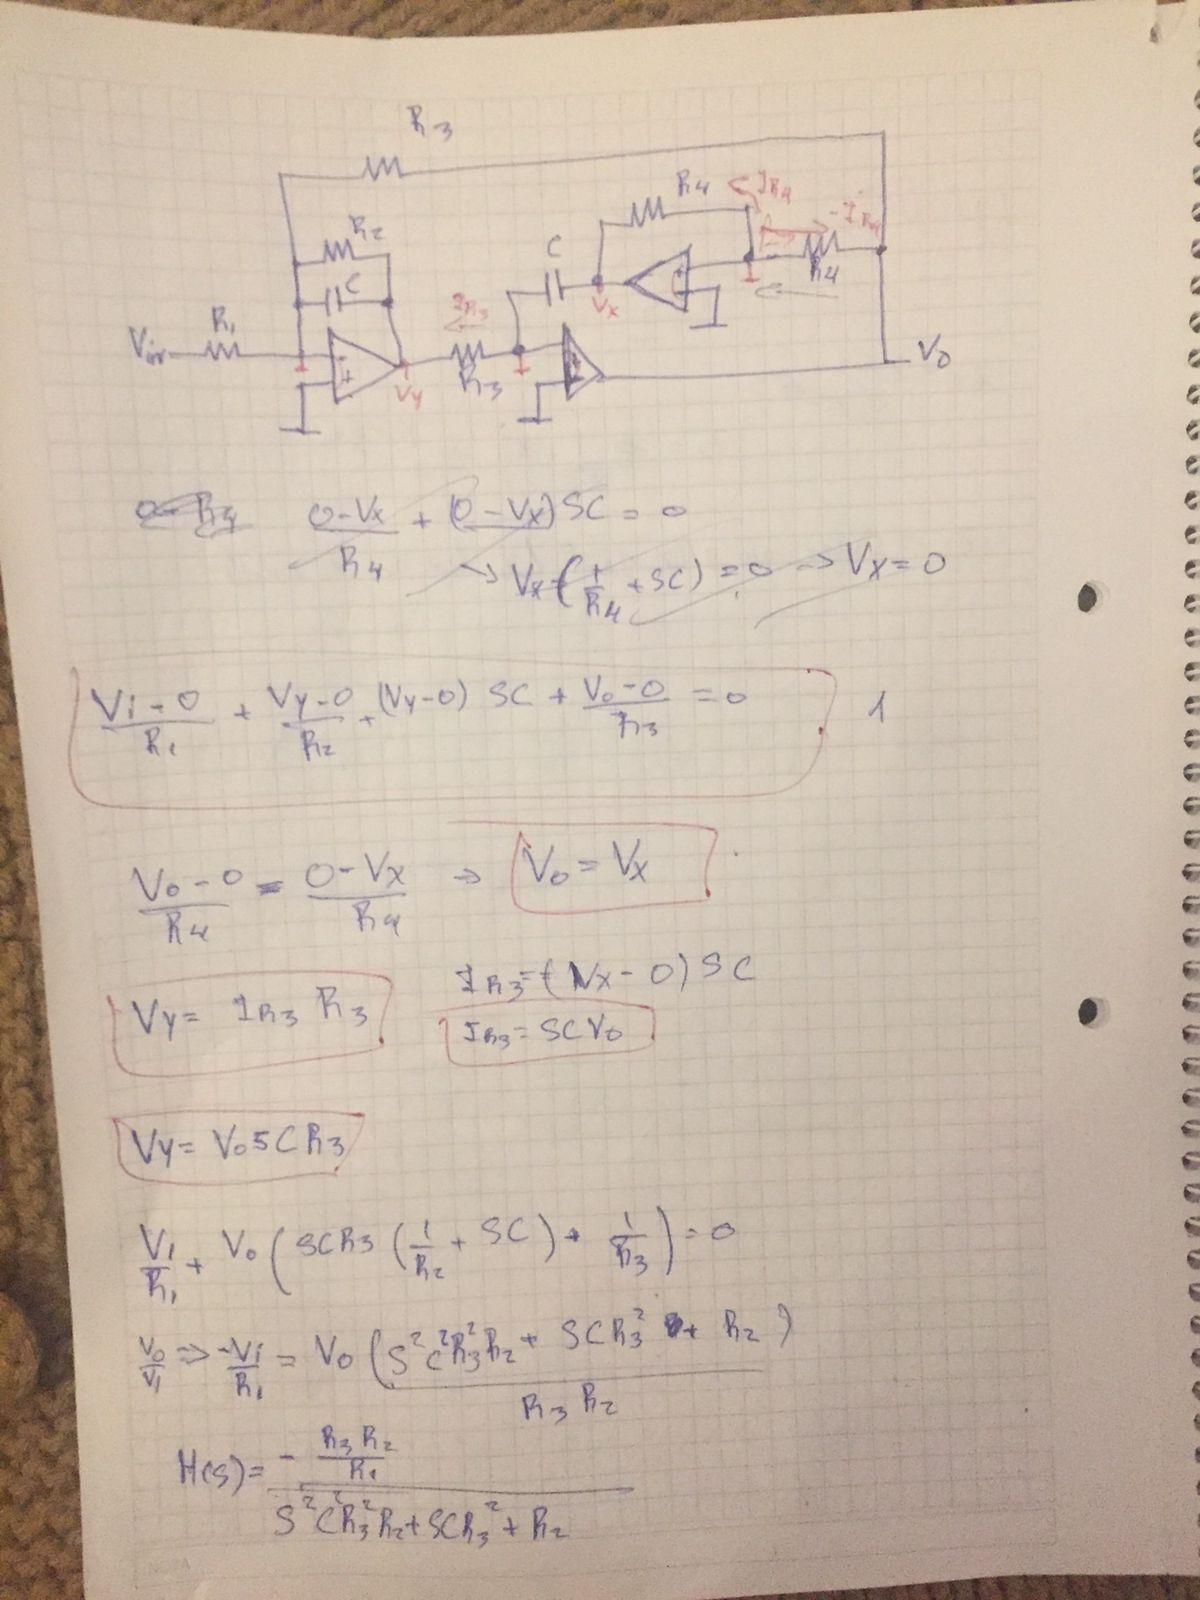


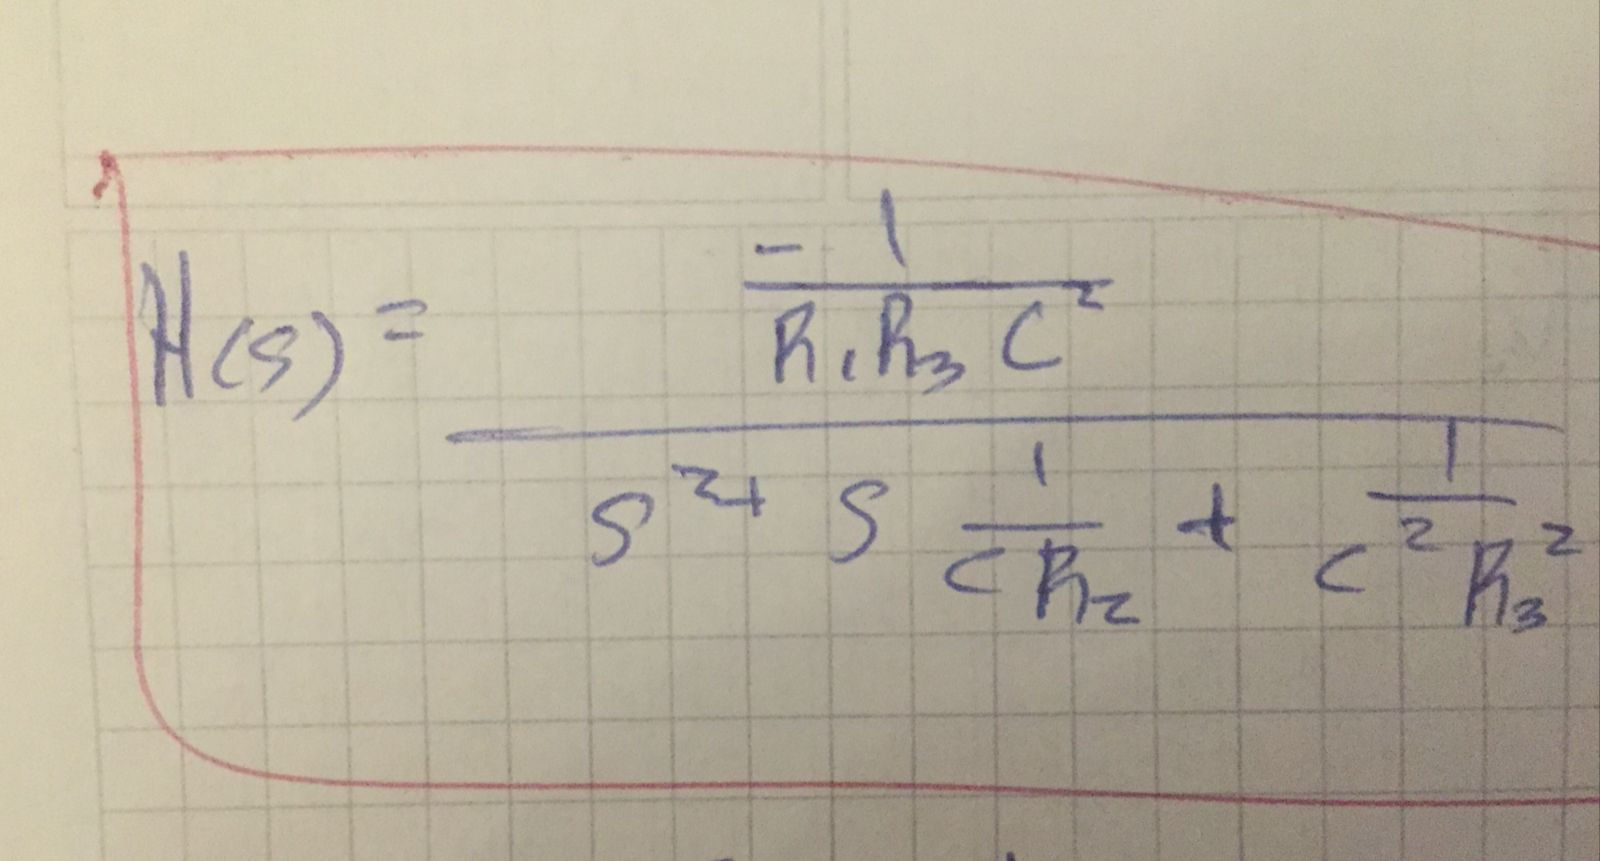

# Bonus:

## Obtener los valores de la red normalizados en frecuencia e impedancia:
$R_{n1} = \frac{R_1}{R_o}$, $R_{n2} = \frac{R_2}{R_o}$, $R_{n3} = \frac{R_3}{R_o}$, $C_n = C.R_o.\Omega_o$  
  
$H(s) = -\frac{\frac{\Omega_o²}{R_{n1}.R_{n3}.C_n²}}{s²+s.\frac{\Omega_o}{C_n.R_{n2}}+\frac{\Omega_o²}{R_{n3}².C_n²}}$  
$\Omega_o = R_{n3}.C_n$  ;  $R_o = 1$  
  
$H(s) = -\frac{\frac{R_{n3}}{R_{n1}}}{s²+s.\frac{R3}{R_{n2}}+1}$  ;  $q = \frac{R_{n2}}{R_{n3}}$  ; $k = \frac{R_{n3}}{R_{n1}}$

$H(s) = -\frac{k}{s²+s.\frac{1}{q}+1}$

## Sensibilidades:
$S_c^{\omega_o}$ $S_{R2}^{Q}$ $S_{R3}^{Q}$

$\omega_o = \frac{1}{R_3.C}$  
$S_c^{\omega_o} = \frac{C}{\omega_o}.\frac{dC}{d\omega_o}$ = -1

$q = \frac{R2}{R3}$

$S_{R_2}^{Q} = \frac{R_2}{Q}.\frac{dQ}{dR_2} = \frac{R_2}{R3}.\frac{1}{Q} = 1$  

$S_{R_3}^{Q} = \frac{R_3}{Q}.\frac{dQ}{dR_3} = -\frac{R_3.R2}{R3²}.\frac{1}{Q} = -1$  

$\frac{\vartriangle\omega_o}{\omega_o} = S_c^{\omega_o}.\frac{\vartriangle.C}{C}$  
$\frac{\vartriangle\omega_o}{\omega_o} = -\frac{\vartriangle.C}{C}$  

$\frac{\vartriangle.Q}{Q} = S_{R2}^{Q}.\frac{\vartriangle.R_2}{R_2} + S_{R3}^{Q}.\frac{\vartriangle.R_3}{R_3}$  
$\frac{\vartriangle.Q}{Q} = \frac{\vartriangle.R_2}{R_2} - \frac{\vartriangle.R_3}{R_3}$

## Recalcular los valores de la red para que cumpla con una transferencia Butterworth:
Para que sea un filtro Butterworth $q$ tiene que ser $\frac{\sqrt{2}}{2}$.  
$q = \frac{R_2}{R_3} = \frac{\sqrt{2}}{2}$

Para obtener un filtro Butterworth solo tendremos que cambiar el valor de la resistencia $R_2$. Esta va a tener un numero va a ser $R_3.\frac{\sqrt{2}}{2} = 7.071 k\Omega$. Utilizando una tabla de resistencias comerciales obtenemos que la resistencia mas cercana es $6,8 k\Omega$.

(4, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

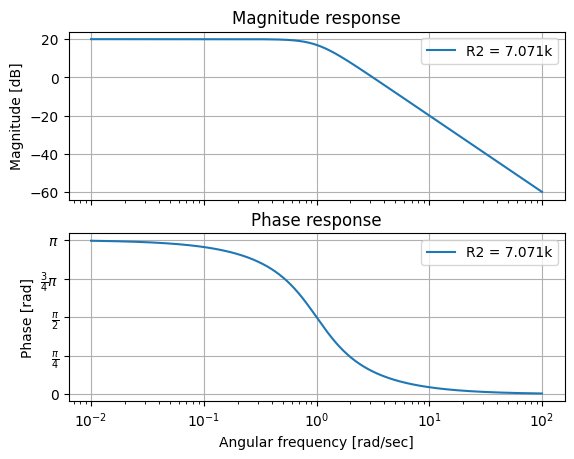

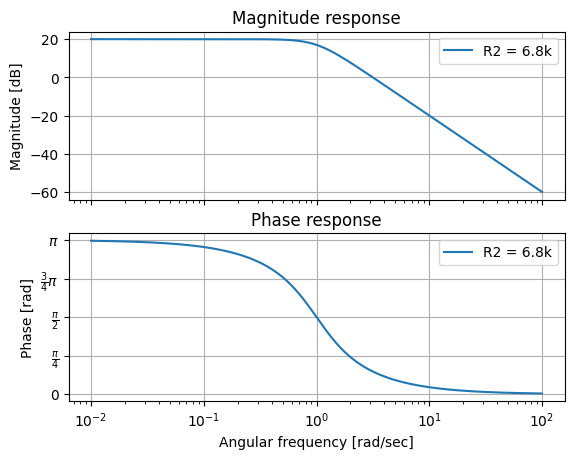

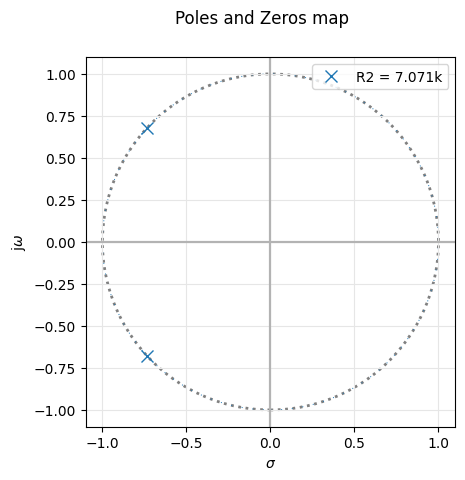

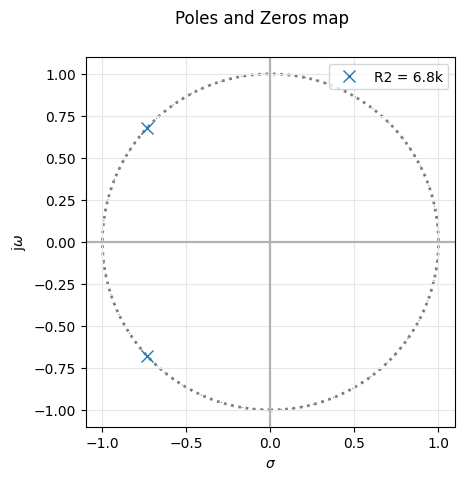

In [2]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, bodePlot

R2i = 7.071*10**3 # i = ideal
R2r =6.8*10**3 # r = real
R3 = 10*10**3
R1 = 100
k = (R3/R1)**(1/2) # k = (R3/R1)
qi = R2i/R3
qr = R2r/R3

plt.close('all')


    
my_tfi = TransferFunction( [-1*k], [1, 1/qi, 1])
my_tfr = TransferFunction( [-1*k], [1, 1/qr, 1])

bodePlot(my_tfi, fig_id=1, filter_description = 'R2 = 7.071k')
bodePlot(my_tfi, fig_id=2, filter_description = 'R2 = 6.8k')

pzmap(my_tfr, fig_id=3, filter_description = 'R2 = 7.071k') #S plane pole/zero plot
pzmap(my_tfr, fig_id=4, filter_description = 'R2 = 6.8k') #S plane pole/zero plot

Comparando ambos circuitos podemos ver que son practicamente iguales esto significa que la variacion de la resistencia $R_2$ no afecto al funcionamiento del circuito.

## Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann):
Para poder lograr esto solo hay que cambiar el lugar donde medimos el $V_o$. Para poder conseguir un pasa banda el $V_o$ tendria que ser medido donde se encuentra el $V_y$ en el dibujo de arriba.
En estos calculos vamos a tomar al $V_o$ viejo como $V_a$, $V_x = V_b$ y nuestro nuevo $V_o$ va a ser $V_y$.
  
$\frac{V_i}{R_1}+\frac{V_o}{R_2}+V_o.s.C+\frac{V_a}{R_3} = 0$  
$V_a = I_{R4}.R_4$ ; $I_{R3}= -\frac{V_o}{R_3} = V_b.sC$  
$-V_a = V_b$  
$V_a = V_o.\frac{1}{R_3.s.C}$  
$\frac{V_i}{R_1}+V_o(\frac{1}{R_2}+s.C´+\frac{1}{R_3².s.C}) = 0$
$H(s) = \frac{-s.\frac{1}{R_1.C}}{s²+s.\frac{1}{C.R_2}+\frac{1}{C².R_3²}}$

Normalizando la trasferencia:  
$\Omega_o = C.R_3$  
$H(s) = \frac{-s.\frac{R_3}{R_1}}{s²+s.\frac{R_3}{R_2}+1}$  
Siendo $q =\frac{R_2}{R_3}$, y $k = \frac{R_3}{R_1}$. La trasferencia nos queda de la siguiente manera:  
$H(s) = \frac{-s.k}{s²+s.\frac{1}{q}+1}$  
  
Comparando esta trasferencia con la obtenida anteriormente podemos observar que es identica a diferencia de que en esta el denominador esta multimplicado por $s$. Pero tanto la $q$ como la $k$ son los mismos.

Utilizando los componentes originales nos queda:
$R_{2i} = 7.071.k\Omega ; R_{2r} = 6.8 k\Omega ; R_3 = 10.k\Omega ; R_1 = 100 \Omega$

(4, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

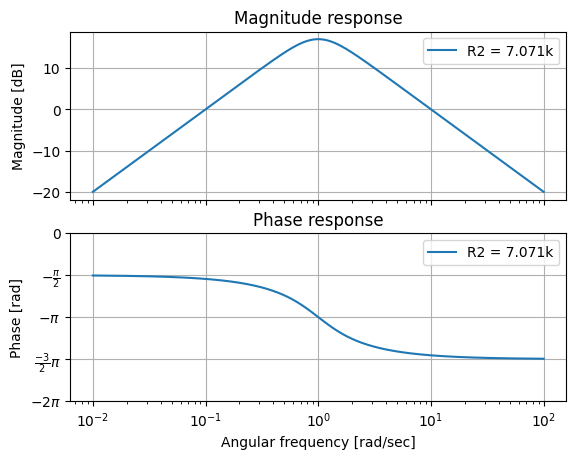

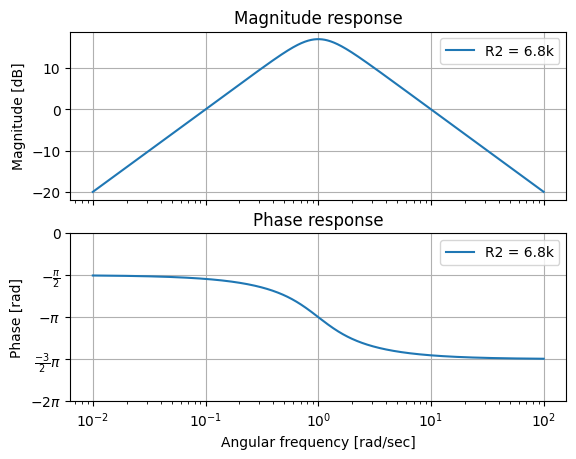

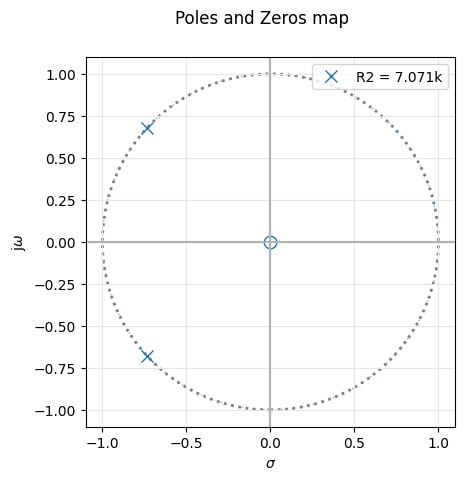

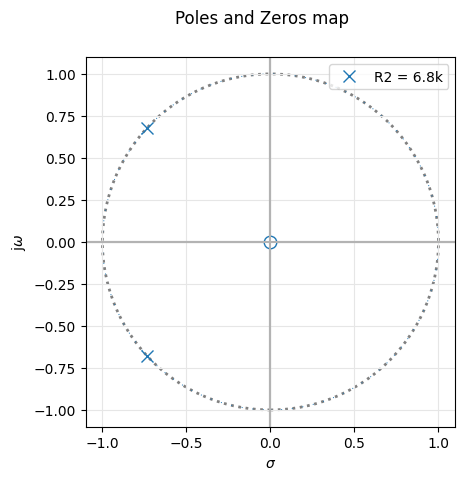

In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, bodePlot

R2i = 7.071*10**3 # i = ideal
R2r =6.8*10**3 # r = real
R3 = 10*10**3
R1 = 100
k = (R3/R1)**(1/2) # k = (R3/R1)
qi = R2i/R3
qr = R2r/R3

plt.close('all')


    
my_tfi = TransferFunction( [-1*k,0], [1, 1/qi, 1])
my_tfr = TransferFunction( [-1*k,0], [1, 1/qr, 1])

bodePlot(my_tfi, fig_id=1, filter_description = 'R2 = 7.071k')
bodePlot(my_tfi, fig_id=2, filter_description = 'R2 = 6.8k')

pzmap(my_tfr, fig_id=3, filter_description = 'R2 = 7.071k') #S plane pole/zero plot
pzmap(my_tfr, fig_id=4, filter_description = 'R2 = 6.8k') #S plane pole/zero plot